# Linear Optimization Homework 3

## Question 1 

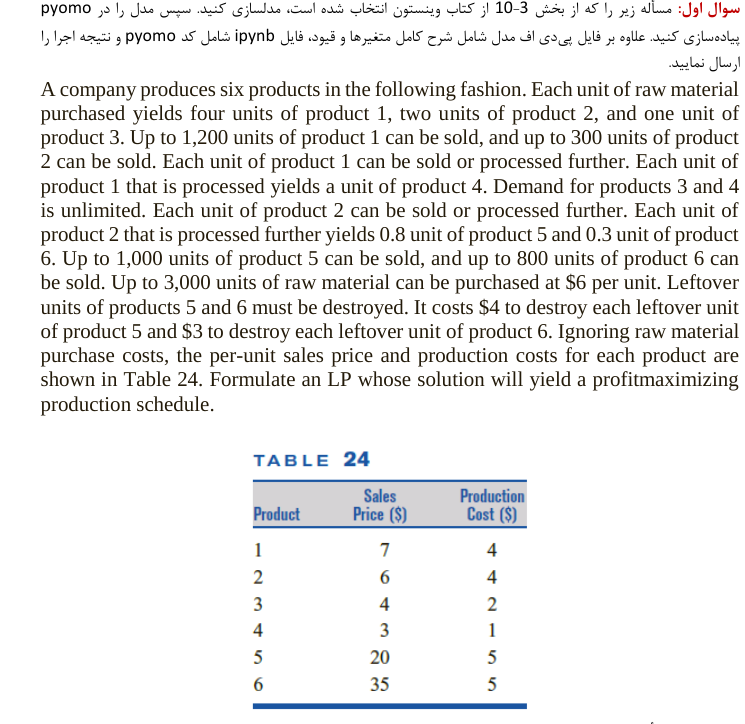


## Solution 

In [8]:
import pyomo.environ as pyo
import math

In [9]:
# Create concenterate model 
model = pyo.ConcreteModel()
# create sets for variables
model.iset=pyo.Set(initialize=[1,2,3,4,5,6])
model.jset=pyo.Set(initialize=[1,2])
model.kset=pyo.Set(initialize=[5,6])
data_y ={
    1:1200,
    2:300,
    5:1000,
    6:800
}


In [10]:
# define rule functions 
def rule_bound_x(model):
    return (0,3000)
def rule_bound_y (model , i):
    if i==3 or i ==4 :
        return (0,math.inf)
    else: 
        return (0,data_y[i])
# define variables
model.x=pyo.Var(domain = pyo.NonNegativeReals,bounds=rule_bound_x)
model.y= pyo.Var(model.iset,domain = pyo.NonNegativeReals,bounds=rule_bound_y)
model.z = pyo.Var(model.jset,domain= pyo.NonNegativeReals)
model.p = pyo.Var ( model.kset,domain=pyo.NonNegativeReals)


In [11]:

# define dic for objective function 
costs = {
    1:7,
    2:6,
    3:4,
    4:2,
    5:15,
    6:15
}
model.c = pyo.Param(model.iset,initialize=costs)

def obj_rule(model):
    income=sum(model.c[i]*model.y[i] for i in model.iset)
    costs=32*model.x+9*model.p[5]+8*model.p[6]
    return income - costs
model.obj=pyo.Objective(rule=obj_rule,sense = pyo.maximize)

def const1_rule(model):
    equation= model.y[1]+model.z[1] == 4 * model.x
    return equation

def const2_rule(model):
    equation= model.y[2]+model.z[2] == 2 * model.x
    return equation

def const3_rule(model):
    equation= model.y[4] == model.z[1] 
    return equation

def const4_rule(model):
    equation= model.y[4] == model.z[1] 
    return equation
def const5_rule(model):
    equation= model.y[3] == model.x 
    return equation
def const6_rule(model): 
    equation= 0.8*model.z[2] == model.y[5]+model.p[5]
    return equation
def const7_rule(model): 
    equation= 0.3*model.z[2] == model.y[6]+model.p[6]
    return equation

In [12]:
# define consts
model.const1=pyo.Constraint(rule=const1_rule)
model.const2=pyo.Constraint(rule=const2_rule)
model.const3=pyo.Constraint(rule=const3_rule)
model.const4=pyo.Constraint(rule=const4_rule)
model.const5=pyo.Constraint(rule=const5_rule)
model.const6=pyo.Constraint(rule=const6_rule)
model.const7=pyo.Constraint(rule=const7_rule)


In [13]:
#solve
result=pyo.SolverFactory('glpk').solve(model,'glpk',keepfiles=True,tee=True)

Solver log file: '/tmp/tmpwjvrcqlh.glpk.log'
Solver solution file: '/tmp/tmpxkx2f3qj.glpk.raw'
Solver problem files: ('/tmp/tmpo5gs3nwa.pyomo.lp',)
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmpxkx2f3qj.glpk.raw --wglp /tmp/tmpg3hszji2.glpk.glp --cpxlp
 /tmp/tmpo5gs3nwa.pyomo.lp
Reading problem data from '/tmp/tmpo5gs3nwa.pyomo.lp'...
8 rows, 12 columns, 19 non-zeros
71 lines were read
Writing problem data to '/tmp/tmpg3hszji2.glpk.glp'...
57 lines were written
GLPK Simplex Optimizer, v4.65
8 rows, 12 columns, 19 non-zeros
Preprocessing...
6 rows, 6 columns, 12 non-zeros
Scaling...
 A: min|aij| =  3.000e-01  max|aij| =  4.000e+00  ratio =  1.333e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 5
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (3)
*     6: obj =   1.412500000e+04 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (40821 bytes)
Writin

In [21]:
print (str(result.solver))
print (str(result.solver.status))
print (str(result.solver.termination_condition))
model.display()
# print (20 * "-")
# print ("X : "+ model.x)
# for i in model.iset:
#     print("Y"+str(i)+" :" + str(model.y[i]))
# for j in model.jset:
#     print("Z"+str(j)+" :" + str(model.z[j]))
# for k in model.kset:
#     print("Y"+str(k)+" :" + str(model.p[k]))



- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.01585984230041504

ok
optimal
Model unknown

  Variables:
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 : 625.0 :  3000 : False : False : NonNegativeReals
    y : Size=6, Index=iset
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
          1 :     0 : 1200.0 :  1200 : False : False : NonNegativeReals
          2 :     0 :    0.0 :   300 : False : False : NonNegativeReals
          3 :     0 :  625.0 :  None : False : False : NonNegativeReals
          4 :     0 : 1300.0 :  None : False : False : NonNegativeReals
          5 :     0 : 1000.0 :  1000 : False : False : NonNegativeReals
          6 :     0 :  375.0 :   800 : False : False : NonNegativeReals
    z : Size=2, Index=jset
        Key : Lower : Value  : Upper : Fixed :